# Binary Classification Machine Learning Case Study Project

## 1-1 Problem detection phishing attack

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

# 1.2 Load the Dataset

In [2]:
url = 'datasetphishingAttack.csv'
dataset = pd.read_csv(url)
dataset.columns

Index(['google_index', 'page_rank', 'nb_hyperlinks', 'web_traffic',
       'domain_age', 'nb_www', 'safe_anchor', 'length_url', 'ratio_digits_url',
       'shortest_word_host', 'domain_registration_length', 'longest_words_raw',
       'phish_hints', 'length_hostname', 'char_repeat', 'shortest_word_path',
       'nb_slash', 'domain_in_title', 'shortest_words_raw', 'nb_dots',
       'ratio_digits_host', 'longest_word_host', 'nb_hyphens', 'ip', 'nb_qm',
       'status'],
      dtype='object')

## Data cleaning

Check for duplicated records and remove them

In [3]:
dataset.drop_duplicates()

,google_index,page_rank,nb_hyperlinks,web_traffic,domain_age,nb_www,safe_anchor,length_url,ratio_digits_url,shortest_word_host,...,nb_slash,domain_in_title,shortest_words_raw,nb_dots,ratio_digits_host,longest_word_host,nb_hyphens,ip,nb_qm,status
0,1,4,17,0,-1,1,0.000000,37,0.000000,3,...,3,0,3,3,0.000000,11,0,0,0,legitimate
1,1,2,30,0,5767,0,100.000000,77,0.220779,19,...,5,1,2,1,0.000000,19,0,1,0,phishing
2,1,0,4,5828815,4004,0,100.000000,126,0.150794,3,...,5,1,2,4,0.000000,13,1,1,1,phishing
3,0,3,149,107721,-1,0,62.500000,18,0.000000,5,...,2,1,5,2,0.000000,5,0,0,0,legitimate
4,0,6,102,8725,8175,1,0.000000,55,0.000000,3,...,5,0,3,2,0.000000,7,2,0,0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,6,199,3980,5396,1,0.000000,45,0.000000,3,...,4,0,3,2,0.000000,9,0,0,0,legitimate
11426,1,0,3,0,6728,1,0.000000,84,0.023810,3,...,5,1,3,5,0.000000,10,0,0,1,phishing
11427,1,10,68,8,8515,1,80.000000,105,0.142857,3,...,5,0,1,2,0.000000,8,6,1,1,legitimate
11428,0,4,32,2455493,2836,1,0.000000,38,0.000000,3,...,3,1,3,2,0.000000,22,0,0,0,legitimate


Check for the null column value and remove the corresponding record

In [4]:
dataset.dropna(how='all')

,google_index,page_rank,nb_hyperlinks,web_traffic,domain_age,nb_www,safe_anchor,length_url,ratio_digits_url,shortest_word_host,...,nb_slash,domain_in_title,shortest_words_raw,nb_dots,ratio_digits_host,longest_word_host,nb_hyphens,ip,nb_qm,status
0,1,4,17,0,-1,1,0.000000,37,0.000000,3,...,3,0,3,3,0.000000,11,0,0,0,legitimate
1,1,2,30,0,5767,0,100.000000,77,0.220779,19,...,5,1,2,1,0.000000,19,0,1,0,phishing
2,1,0,4,5828815,4004,0,100.000000,126,0.150794,3,...,5,1,2,4,0.000000,13,1,1,1,phishing
3,0,3,149,107721,-1,0,62.500000,18,0.000000,5,...,2,1,5,2,0.000000,5,0,0,0,legitimate
4,0,6,102,8725,8175,1,0.000000,55,0.000000,3,...,5,0,3,2,0.000000,7,2,0,0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,6,199,3980,5396,1,0.000000,45,0.000000,3,...,4,0,3,2,0.000000,9,0,0,0,legitimate
11426,1,0,3,0,6728,1,0.000000,84,0.023810,3,...,5,1,3,5,0.000000,10,0,0,1,phishing
11427,1,10,68,8,8515,1,80.000000,105,0.142857,3,...,5,0,1,2,0.000000,8,6,1,1,legitimate
11428,0,4,32,2455493,2836,1,0.000000,38,0.000000,3,...,3,1,3,2,0.000000,22,0,0,0,legitimate


# 1.3 Analyze Data

## 1.3.1 Descriptive Statistics

In [5]:
dataset

,google_index,page_rank,nb_hyperlinks,web_traffic,domain_age,nb_www,safe_anchor,length_url,ratio_digits_url,shortest_word_host,...,nb_slash,domain_in_title,shortest_words_raw,nb_dots,ratio_digits_host,longest_word_host,nb_hyphens,ip,nb_qm,status
0,1,4,17,0,-1,1,0.000000,37,0.000000,3,...,3,0,3,3,0.000000,11,0,0,0,legitimate
1,1,2,30,0,5767,0,100.000000,77,0.220779,19,...,5,1,2,1,0.000000,19,0,1,0,phishing
2,1,0,4,5828815,4004,0,100.000000,126,0.150794,3,...,5,1,2,4,0.000000,13,1,1,1,phishing
3,0,3,149,107721,-1,0,62.500000,18,0.000000,5,...,2,1,5,2,0.000000,5,0,0,0,legitimate
4,0,6,102,8725,8175,1,0.000000,55,0.000000,3,...,5,0,3,2,0.000000,7,2,0,0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,6,199,3980,5396,1,0.000000,45,0.000000,3,...,4,0,3,2,0.000000,9,0,0,0,legitimate
11426,1,0,3,0,6728,1,0.000000,84,0.023810,3,...,5,1,3,5,0.000000,10,0,0,1,phishing
11427,1,10,68,8,8515,1,80.000000,105,0.142857,3,...,5,0,1,2,0.000000,8,6,1,1,legitimate
11428,0,4,32,2455493,2836,1,0.000000,38,0.000000,3,...,3,1,3,2,0.000000,22,0,0,0,legitimate


We will start off by confirming the dimensions of the dataset, e.g. the number of rows and
columns.


In [6]:
# shape
print(dataset.shape)

(11430, 26)


We have  eleven thousand four hundred thirty (11430) instances to work with and can confirm the data has twenty-six (26) attributes including
the class attribute. 

Let’s also look at the data types of each attribute

In [8]:
print(dataset.dtypes)

google_index                    int64
page_rank                       int64
nb_hyperlinks                   int64
web_traffic                     int64
domain_age                      int64
nb_www                          int64
safe_anchor                   float64
length_url                      int64
ratio_digits_url              float64
shortest_word_host              int64
domain_registration_length      int64
longest_words_raw               int64
phish_hints                     int64
length_hostname                 int64
char_repeat                     int64
shortest_word_path              int64
nb_slash                        int64
domain_in_title                 int64
shortest_words_raw              int64
nb_dots                         int64
ratio_digits_host             float64
longest_word_host               int64
nb_hyphens                      int64
ip                              int64
nb_qm                           int64
status                         object
dtype: objec

Let’s now take a peek at the first 5 rows of the data.

In [9]:
print(dataset.head(5))

   google_index  page_rank  nb_hyperlinks  web_traffic  domain_age  nb_www  \
0             1          4             17            0          -1       1   
1             1          2             30            0        5767       0   
2             1          0              4      5828815        4004       0   
3             0          3            149       107721          -1       0   
4             0          6            102         8725        8175       1   

   safe_anchor  length_url  ratio_digits_url  shortest_word_host  ...  \
0          0.0          37          0.000000                   3  ...   
1        100.0          77          0.220779                  19  ...   
2        100.0         126          0.150794                   3  ...   
3         62.5          18          0.000000                   5  ...   
4          0.0          55          0.000000                   3  ...   

   nb_slash  domain_in_title  shortest_words_raw  nb_dots  ratio_digits_host  \
0         3 

Let’s summarize the distribution of each attribute

In [10]:
print(dataset.describe())

       google_index     page_rank  nb_hyperlinks   web_traffic    domain_age  \
count  11430.000000  11430.000000   11430.000000  1.143000e+04  11430.000000   
mean       0.533946      3.185739      87.189764  8.567566e+05   4062.543745   
std        0.498868      2.536955     166.758254  1.995606e+06   3107.784600   
min        0.000000      0.000000       0.000000  0.000000e+00    -12.000000   
25%        0.000000      1.000000       9.000000  0.000000e+00    972.250000   
50%        1.000000      3.000000      34.000000  1.651000e+03   3993.000000   
75%        1.000000      5.000000     101.000000  3.738455e+05   7026.750000   
max        1.000000     10.000000    4659.000000  1.076799e+07  12874.000000   

             nb_www   safe_anchor    length_url  ratio_digits_url  \
count  11430.000000  11430.000000  11430.000000      11430.000000   
mean       0.448469     37.063922     61.126684          0.053137   
std        0.501912     39.073385     55.297318          0.089363   
min

Let’s take a quick look at the breakdown of class values.


In [11]:
# class distribution
dataset.groupby('status').size()

status
legitimate    5715
phishing      5715
dtype: int64

We can see that the classes are reasonably balanced between legitimate and phishing      .

<AxesSubplot: >

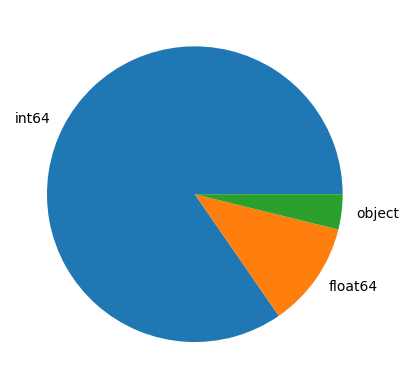

In [16]:
dataset.dtypes.value_counts().plot.pie()

In [13]:
this figure show us  the the distribution of data types 

SyntaxError: invalid syntax (1434723414.py, line 1)

## 1.3.2 Unimodal Data Visualizations

array([[<AxesSubplot: title={'center': 'google_index'}>,
        <AxesSubplot: title={'center': 'page_rank'}>,
        <AxesSubplot: title={'center': 'nb_hyperlinks'}>,
        <AxesSubplot: title={'center': 'web_traffic'}>,
        <AxesSubplot: title={'center': 'domain_age'}>],
       [<AxesSubplot: title={'center': 'nb_www'}>,
        <AxesSubplot: title={'center': 'safe_anchor'}>,
        <AxesSubplot: title={'center': 'length_url'}>,
        <AxesSubplot: title={'center': 'ratio_digits_url'}>,
        <AxesSubplot: title={'center': 'shortest_word_host'}>],
       [<AxesSubplot: title={'center': 'domain_registration_length'}>,
        <AxesSubplot: title={'center': 'longest_words_raw'}>,
        <AxesSubplot: title={'center': 'phish_hints'}>,
        <AxesSubplot: title={'center': 'length_hostname'}>,
        <AxesSubplot: title={'center': 'char_repeat'}>],
       [<AxesSubplot: title={'center': 'shortest_word_path'}>,
        <AxesSubplot: title={'center': 'nb_slash'}>,
        <A

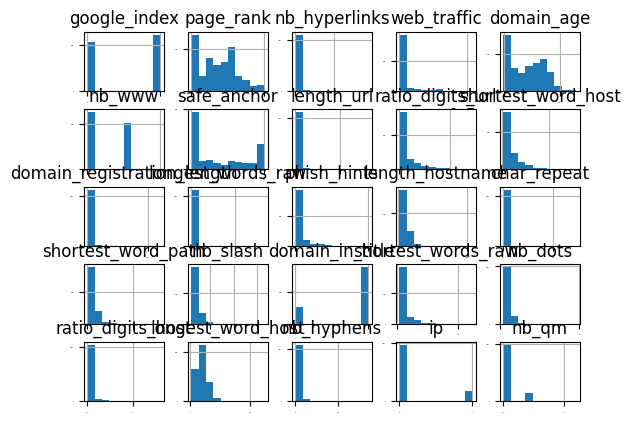

In [17]:
dataset.hist(xlabelsize=1,ylabelsize=1)

In [ ]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1)
plt.show()

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
plt.show()

## 1.3.3 Multimodal Data Visualizations

Let’s visualize the correlations between the attributes.

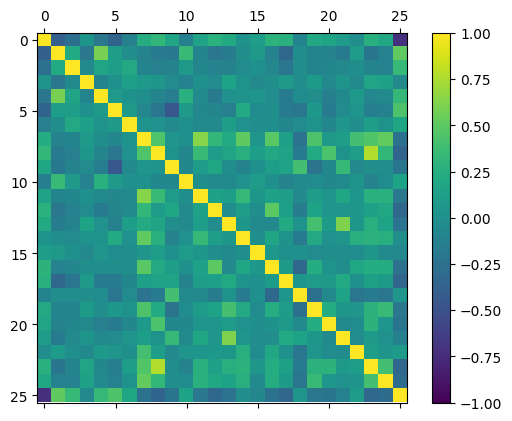

In [54]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [55]:
dataset.corr(method='pearson')

,google_index,page_rank,nb_hyperlinks,web_traffic,domain_age,nb_www,safe_anchor,length_url,ratio_digits_url,shortest_word_host,...,nb_slash,domain_in_title,shortest_words_raw,nb_dots,ratio_digits_host,longest_word_host,nb_hyphens,ip,nb_qm,status
google_index,1.000000,-0.389887,-0.272072,0.034099,-0.210111,-0.354688,-0.129494,0.236395,0.323133,0.177026,...,0.290692,0.267465,-0.100075,0.209616,0.164363,0.101597,-0.018828,0.270743,0.201260,-0.731171
page_rank,-0.389887,1.000000,0.223463,-0.209526,0.589602,0.110624,-0.013492,-0.102582,-0.181056,-0.190724,...,-0.115744,-0.330810,-0.016846,-0.097312,-0.106494,-0.169182,0.104341,-0.218968,-0.123852,0.511137
nb_hyperlinks,-0.272072,0.223463,1.000000,-0.046894,0.164593,0.113978,0.206335,-0.099016,-0.127299,-0.109349,...,-0.072247,-0.217113,-0.021856,-0.095434,-0.085001,-0.061248,-0.007035,-0.096277,-0.110625,0.342628
web_traffic,0.034099,-0.209526,-0.046894,1.000000,-0.096698,0.004236,0.129578,0.072205,0.061946,-0.033734,...,-0.004376,0.081786,-0.013973,0.087969,-0.059411,0.038649,-0.041464,0.167930,0.143777,-0.060388
domain_age,-0.210111,0.589602,0.164593,-0.096698,1.000000,0.080877,0.025844,-0.006798,-0.092739,-0.147911,...,-0.019938,-0.174976,-0.024155,-0.007818,-0.130580,-0.048291,0.080104,-0.077020,-0.045623,0.331889
nb_www,-0.354688,0.110624,0.113978,0.004236,0.080877,1.000000,0.080141,-0.073490,-0.212138,-0.453481,...,-0.005782,-0.181009,-0.216494,0.067286,-0.167117,-0.038169,0.040640,-0.137853,-0.121890,0.443468
safe_anchor,-0.129494,-0.013492,0.206335,0.129578,0.025844,0.080141,1.000000,0.020460,0.009853,-0.050733,...,-0.002555,-0.078870,-0.034693,0.026385,-0.071696,0.039148,-0.000316,0.117002,0.018995,0.173397
length_url,0.236395,-0.102582,-0.099016,0.072205,-0.006798,-0.073490,0.020460,1.000000,0.446116,0.041109,...,0.484768,0.125159,-0.239337,0.443589,0.080929,0.115258,0.399564,0.453961,0.520930,-0.248580
ratio_digits_url,0.323133,-0.181056,-0.127299,0.061946,-0.092739,-0.212138,0.009853,0.446116,1.000000,0.017338,...,0.210487,0.151232,-0.167936,0.222520,0.432093,0.016137,0.110434,0.768906,0.326464,-0.356395
shortest_word_host,0.177026,-0.190724,-0.109349,-0.033734,-0.147911,-0.453481,-0.050733,0.041109,0.017338,1.000000,...,0.117765,0.149821,0.404820,-0.232142,-0.074565,0.343346,-0.055397,-0.000995,-0.002248,-0.223084


A correlation matrix is a table showing correlation coefficients between multiple variables. In this case, the correlation between the "ratio_digits_url" and "ip" attributes is 0.768. This value can be interpreted as the strength and direction of the linear relationship between the two variables.

A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases. A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases. A correlation coefficient of 0 indicates no correlation between the two variables.

A correlation coefficient of 0.768 is considered to be a strong positive correlation. It means that as the ratio_digits_url attribute increases, the ip attribute also increases.
It is important to mention that correlation does not imply causation.

# 1.4 Validation Dataset

In [ ]:
encoding using replace method

In [56]:
dataset['status'] = dataset['status'].replace({"phishing": 0})
dataset['status'] = dataset['status'].replace({"legitimate": 1})

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [57]:
# Split-out validation dataset
array=dataset.values
Y = array[:,25]
X = array[:,0:25].astype(float)
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size,random_state=seed)

## 1.5 Evaluate Algorithms: Baseline

Prepare the Test Harness for Evaluating Algorithms

In [34]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy' 
seed= 7

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this classification
problem. The six algorithms selected include:
* Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA)
* Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).


In [60]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


The algorithms all use default tuning parameters. Let’s compare the algorithms. We will
display the mean and standard deviation of accuracy for each algorithm as we calculate it and
collect the results for use later.


In [61]:

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)#
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.792323 (0.009040)
KNN: 0.835190 (0.013828)
CART: 0.933838 (0.006734)
SVM: 0.596457 (0.011957)


These are just mean accuracy values. It is always wise to look at the distribution of accuracy
values calculated across cross validation folds. We can do that graphically using box and whisker
plots

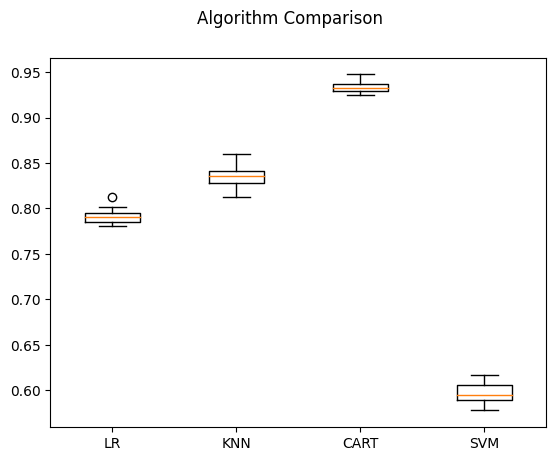

In [62]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## 1.6 Evaluate Algorithms: Standardize Data

A pipeline is a sequence of data processing steps, in which each step transforms the data in some way. Pipelines are often used in machine learning and data science to streamline the process of building and evaluating models

In [64]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
#pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
#LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
#pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
#GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.934384 (0.007727)
ScaledKNN: 0.948492 (0.006774)
ScaledCART: 0.934166 (0.006711)
ScaledSVM: 0.953632 (0.005372)


the results listed below. We can see that KNN is still doing
well, even better than before. We can also see that the standardization of the data has lifted
the skill of SVM to be the most accurate algorithm tested so far.

Again, we should plot the distribution of the accuracy scores using box and whisker plots.

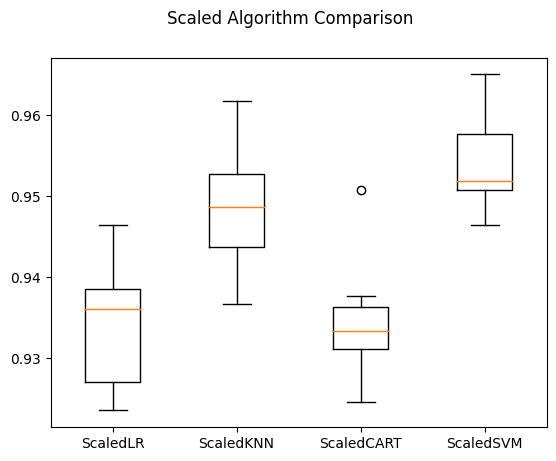

In [66]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## 1.7 Algorithm Tuning

We can start off by tuning the number of neighbors for KNN. The default number of neighbors
is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value
is evaluated using 10-fold cross validation on the training standardized dataset.

In [ ]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.949258 using {'n_neighbors': 7}
0.943350 (0.007052) with: {'n_neighbors': 1}
0.949148 (0.004658) with: {'n_neighbors': 3}
0.947727 (0.007122) with: {'n_neighbors': 5}
0.949258 (0.004782) with: {'n_neighbors': 7}
0.948383 (0.005290) with: {'n_neighbors': 9}
0.946524 (0.005462) with: {'n_neighbors': 11}
0.945430 (0.005765) with: {'n_neighbors': 13}
0.945648 (0.006591) with: {'n_neighbors': 15}
0.945102 (0.005625) with: {'n_neighbors': 17}
0.943789 (0.005962) with: {'n_neighbors': 19}
0.944117 (0.005154) with: {'n_neighbors': 21}


We can see that the optimal configuration is K=7. This is interesting as the algorithm will
make predictions using the most similar instance in the training dataset alone.

## 1.8 Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

* Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM)
* Bagging Methods: Random Forests (RF) and Extra Trees (ET).


In [24]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.944118 (0.008796)
GBM: 0.956146 (0.005112)
RF: 0.964130 (0.004782)
ET: 0.963583 (0.004788)


We can see that both boosting techniques provide strong accuracy scores in the low 80s (%)
with default configurations. We can plot the distribution of accuracy scores across the cross
validation folds

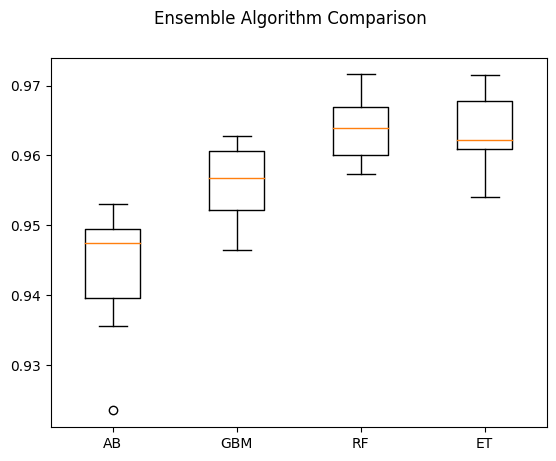

In [25]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest GBM may be worthy of further study, with a strong mean and a spread
that skews up towards high 96s (%) in accuracy.


## 1.9 Finalize Model

In [70]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9593175853018373
[[1089   44]
 [  49 1104]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1133
         1.0       0.96      0.96      0.96      1153

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



We can see that we achieve an accuracy of nearly 96% on the held-out validation dataset. A
score that matches closely to our expectations estimated above during the tuning of SVM.

Text(0.5, 36.72222222222221, 'Predicted Class')

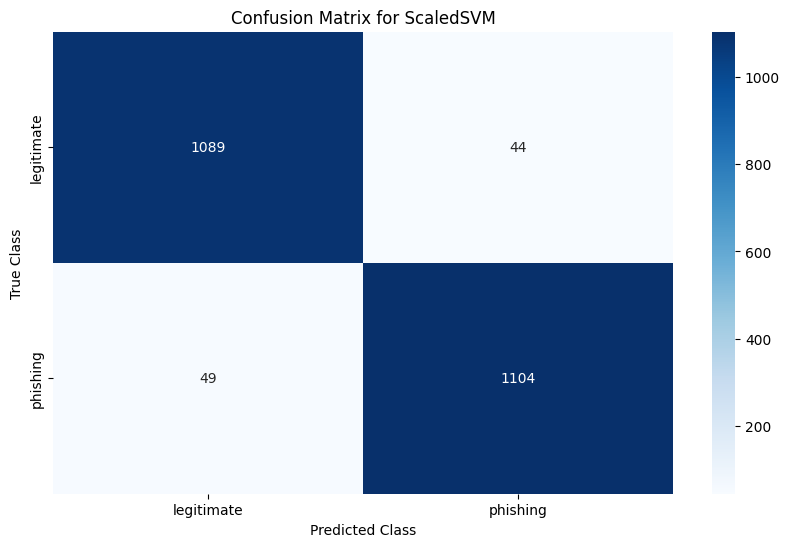

In [72]:
labels = ['legitimate', 'phishing']
conf_matrix = confusion_matrix(Y_validation,predictions)
plt.figure(figsize= (10,6))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for " + name)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')